# Loading Image Data

강아지와 고양이를 구분하는 이미지 분류기를 생성하기 위해서는 고양이와 강아지 사진을 모아야 한다. 임의로 수집된 다음과 같은 고양이/강아지 사진을 사용하자.
![img](../assets/dog_cat.png)
이 사진을 사용하여 CNN으로 이미지 분류기를 만들기 위해서는 해당 사진을 적절히 전처리하여야 한다.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms


이미지를 전처리하기 위해 가장 쉽고 편한 방법은 `torchvision`패키지의 `datasets.ImageFolder` 을 사용하는 것이다.  ([documentation](http://pytorch.org/docs/master/torchvision/datasets.html#imagefolder)). 일반적으로  `ImageFolder` 의 사용법은 다음과 같다.:

```python
dataset = datasets.ImageFolder('path/to/data', transform=transform)
```

`'path/to/data'` 은 이미지가 있는 디렉토리이다. `transform`은 이미지를 전처리하기 위한 방법이다. [`transforms`](http://pytorch.org/docs/master/torchvision/transforms.html) module은  `torchvision` 패키지의 서브모듈로 다양한 이미지 전처리 메소드를 제공한다.  
ImageFolder는 다음과 같은 구조로 구성되어 있어야 한다.:
```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

각각의 클래스의 이름으로 된 디렉토리가 있어야 한다. (예를 들면 `cat`, `dog`). 각 이미지의 label은 디렉토리의 이름과 같게 된다. 제공되는 Cat_Dog_data.zip 파일은 미리 train과 test로 나뉘어 있다.

### Transforms

`ImageFolder`로 사진 이미지를 읽어 들일 때 , 이미지 데이터를 신경망에서 처리할 수 있도록 적절하게 전처리 해야 한다. 일단 제각각인 사진의 크기를 같은 사이즈가 되도록 해야한다.  
- `transforms.Resize()`  
- `transforms.CenterCrop()`
- `transforms.RandomResizedCrop()` 등

`transforms.ToTensor()`로 이미지를 반드시 PyTorch tensors 로 변환해야 한다. 여러가지 변환은  `transforms.Compose()`로 묶어서 처리가 가능하다. 

해당 전처리는 순서대로 수행된다.:

```python
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

```

참고) [documentation](http://pytorch.org/docs/master/torchvision/transforms.html). 

### Data Loaders

`ImageFolder` 는 이미지를 전처리하여 데이터 셋으로 만든다. 이렇게 만들어진 이미지 데이터 셋을 [`DataLoader`](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader)로 읽어들인다. `DataLoader`로 이미지와 이미지의 label을 읽어 들일 수 있다. shuffle하면 각 epoch 에서 데이터를 읽어 들이기 전에 이미지 데이터를 섞어준다.

```python
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

`dataloader` 는 iterator로 `next()`메소드로 for loop를 통해 반복적으로 읽어들인다.

```python
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

# Get one batch
images, labels = next(iter(dataloader))
```
 
>**실습 :**  `ImageFolder`로 `Cat_Dog_data/train` 폴더에서 이미지를 읽어 들여보시오. transforms을 정의하고 dataloader로 생성하시오.

In [2]:
data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

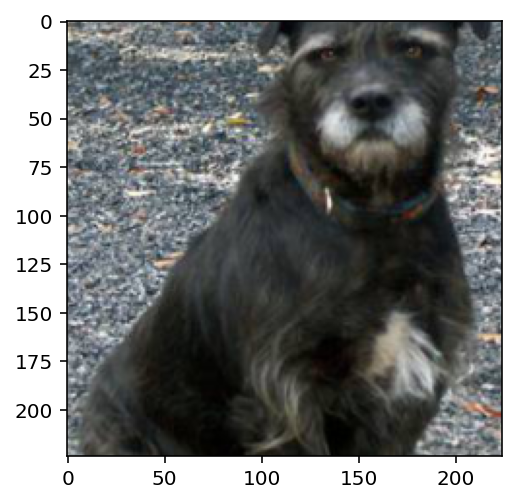

In [6]:
# Run this to test your data loader
images, labels = next(iter(dataloader))
image = images[0].numpy().transpose((1, 2, 0))
plt.imshow(image)

## Data Augmentation

이미지를 임의로 회전, 반전, 스케일 변환, crop등을 통해 다양하게 변환시킨다. 이렇게 이미지를 임의로 변형해서 신경망을 훈련하면 이미지 분류의 성능을 더 향상시킬수 있다.  

다음과 같이 transform을 수행할 수 있다.:

```python
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], 
                                                            [0.5, 0.5, 0.5])])
```

 `transforms.Normalize`로 이미지를 normalize 할 수 있다. means 과 standard deviations을 지정한다.  
 
```input[channel] = (input[channel] - mean[channel]) / std[channel]```

Normalizing 을 하면 신경망의 학습이 더 잘 수행된다. 


>**실습 :** train data와 test data에 대해 transforms를 정의한다 (normalization 은 일단 제외).

In [4]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor()]) 

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=True)

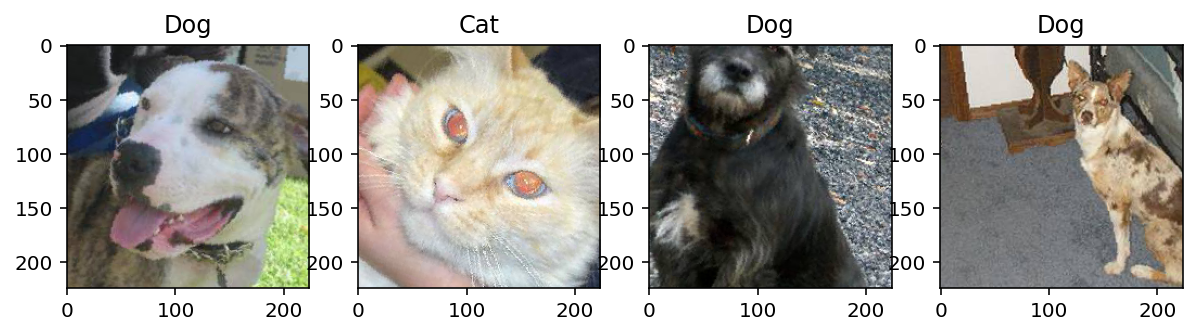

In [5]:
# change this to the trainloader or testloader 
class_name=['Cat', 'Dog']
data_iter = iter(trainloader)

images, labels = next(data_iter)

fig, axes = plt.subplots(figsize=(10,4), ncols=4)

for ii in range(4):
    ax = axes[ii]
    image = images[ii].numpy().transpose((1,2,0))
    ax.set_title(class_name[labels[ii].numpy()])
    ax.imshow(image)

transform된 이미지를 확인해 보자.
